<a href="https://colab.research.google.com/github/AlineBarrucci26/AlineBarrucci26/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 235 kB 40.2 MB/s 
     |████████████████████████████████| 6.4 MB 35.8 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=c975073d45bc4d5677178ca929657feeef7bbea411f6d9bc5b8fa959e3899fda
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [14]:
import investpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
itsa4 = investpy.get_stock_historical_data(stock="ITSA4", country='Brazil', from_date="01/01/2008", to_date="01/01/2018")

In [20]:
itsa4.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2008-01-02,2.44,2.47,2.32,2.34,14185087,BRL
2008-01-03,2.33,2.38,2.29,2.31,16507810,BRL
2008-01-04,2.34,2.35,2.24,2.30,18853530,BRL
2008-01-07,2.31,2.34,2.26,2.30,12627341,BRL
2008-01-08,2.34,2.36,2.30,2.32,14923406,BRL


In [22]:
itsa4 = itsa4.rename({"Close": "ITAU"}, axis=1)
itsa4

,Open,High,Low,ITAU,Volume,Currency
Date,,,,,,
2008-01-02,2.44,2.47,2.32,2.34,14185087,BRL
2008-01-03,2.33,2.38,2.29,2.31,16507810,BRL
2008-01-04,2.34,2.35,2.24,2.30,18853530,BRL
2008-01-07,2.31,2.34,2.26,2.30,12627341,BRL
2008-01-08,2.34,2.36,2.30,2.32,14923406,BRL
...,...,...,...,...,...,...
2017-12-21,7.05,7.30,7.03,7.30,20315652,BRL
2017-12-22,7.26,7.31,7.22,7.30,10227103,BRL
2017-12-26,7.36,7.41,7.32,7.34,7789505,BRL


In [23]:
itsa4 = itsa4.drop(itsa4.columns[[0,1,2,4,5]], axis=1)
itsa4.head()

,ITAU
Date,
2008-01-02,2.34
2008-01-03,2.31
2008-01-04,2.30
2008-01-07,2.30
2008-01-08,2.32


In [25]:
itau_retornos = itsa4.pct_change()
itau_retornos

,ITAU
Date,
2008-01-02,NaN
2008-01-03,-0.012821
2008-01-04,-0.004329
2008-01-07,0.000000
2008-01-08,0.008696
...,...
2017-12-21,0.036932
2017-12-22,0.000000
2017-12-26,0.005479


4. Visualizações de dados

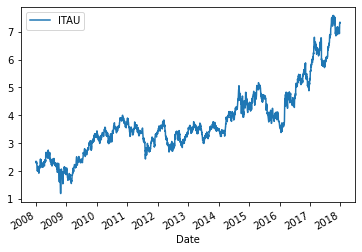

In [26]:
itsa4.plot();

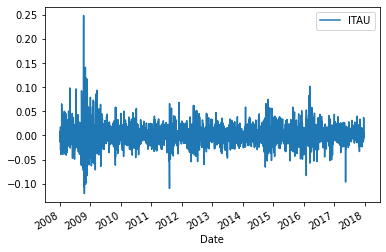

In [27]:
itau_retornos.plot();

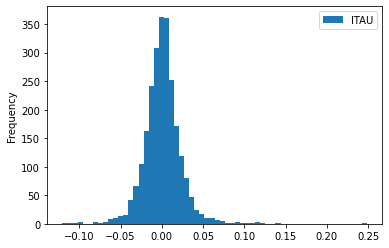

In [28]:
itau_retornos.plot.hist(bins=60);

In [29]:
import pandas as pd
import investpy 
import numpy as np

In [32]:
ativos = ['ITSA4', 'PETR4', 'VALE3', 'ABEV3']

carteira_passado = pd.DataFrame()

for i in ativos:
  df_passado = investpy.get_stock_historical_data(stock=i, country='Brazil', from_date='01/01/2008', to_date='31/12/2018').Close
  df_passado.rename(i,inplace=True)
  df_passado.columns = [i]
  carteira_passado = pd.concat([carteira_passado, df_passado], axis=1)
  carteira_passado.index.name="Date"
carteira_passado

,ITSA4,PETR4,VALE3,ABEV3
Date,,,,
2008-01-02,2.34,32.37,29.85,3.43
2008-01-03,2.31,31.84,30.00,3.44
2008-01-04,2.30,30.28,28.92,3.40
2008-01-07,2.30,29.39,28.41,3.31
2008-01-08,2.32,31.01,28.97,3.37
...,...,...,...,...
2018-12-20,9.43,20.13,39.59,14.44
2018-12-21,9.33,20.18,40.43,14.40
2018-12-26,9.21,20.98,40.09,14.37


In [33]:
carteira_futuro = pd.DataFrame()

for i in ativos:
  df_futuro = investpy.get_stock_historical_data(stock=i, country='Brazil', from_date='01/01/2019', to_date='31/12/2020').Close
  df_futuro.rename(i,inplace=True)
  df_futuro.columns = [i]
  carteira_futuro = pd.concat([carteira_futuro, df_futuro], axis=1)
  carteira_futuro.index.name="Date"
carteira_futuro

,ITSA4,PETR4,VALE3,ABEV3
Date,,,,
2019-01-02,10.05,23.29,40.61,15.33
2019-01-03,10.13,23.86,38.95,15.50
2019-01-04,10.10,23.93,41.49,15.71
2019-01-07,10.09,24.30,41.26,15.64
2019-01-08,10.23,24.16,41.66,15.33
...,...,...,...,...
2020-12-22,10.97,27.28,73.90,15.51
2020-12-23,11.23,27.95,74.26,15.50
2020-12-28,11.35,28.18,74.22,15.77


In [34]:
#Pesos dummy

pesos = np.array([0.25,0.25,0.25,0.25])

In [35]:
cf_anualizado = (carteira_futuro.iloc[-1]-carteira_futuro.iloc[0])/carteira_futuro.iloc[0]
cf_anualizado = ((1+cf_anualizado)**(12/48))-1
cf_anualizado

ITSA4    0.029513
PETR4    0.050286
VALE3    0.163181
ABEV3    0.005178
dtype: float64

In [36]:
cf_anualizado_carteira = cf_anualizado.dot(pesos)
cf_anualizado_carteira

0.06203969122674363

##4. Volatilidade da Carteira

In [37]:
carteira_futuro_retornos = carteira_futuro.pct_change()
cov_fut = carteira_futuro_retornos.cov()

vol_fut_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov_fut,pesos)))
vol_fut_ano = vol_fut_diaria*np.sqrt(252)
vol_fut_ano

0.3482335843316492

##5. Estimando Retornos

##5.1. Retorno médio Histórico

Calcula a média anaulizada dos retornos históricos dos preços (diários). Usar o argumento compounding se necessário para mudar de média geométrica para média aritmética.

In [39]:
! pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 3.4 MB/s 
     |████████████████████████████████| 2.8 MB 11.2 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [40]:
from pypfopt import expected_returns

In [41]:
#Calcular o retorno médio histórico carteira passado

retorno_medio = expected_returns.mean_historical_return(carteira_passado)

retorno_medio

ITSA4    0.139719
PETR4   -0.035376
VALE3    0.028787
ABEV3    0.143730
dtype: float64

In [42]:
#EMA Retorno médio histórico

ema_retorno_medio = np.sum(np.abs(retorno_medio-cf_anualizado))/len(retorno_medio)
ema_retorno_medio

0.11720311526744692

In [43]:
#Média Movel Exponencial 

mme = expected_returns.ema_historical_return(carteira_passado, span=300)
mme

ITSA4    0.398203
PETR4    0.458609
VALE3    0.312667
ABEV3   -0.259820
Name: 2018-12-28 00:00:00, dtype: float64

In [44]:
#Erro médio Absoluto de MME

ema_mme = np.sum(np.abs(mme-cf_anualizado))/len(mme)

ema_mme

0.29787408796039716

In [45]:
#1º Calcular Selic Diaria

selic_aa = 0.064
selic_diaria = (1+selic_aa)**(1/252) -1
selic_diaria

0.00024620248904749786

In [46]:
#2º Calcular IBOV

ibov = investpy.get_index_historical_data('Bovespa', country='Brazil', from_date='01/01/2016', to_date='31/12/2018')
ibov = pd.DataFrame(ibov['Close'])
ibov

,Close
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0
...,...
2018-12-20,85269.0
2018-12-21,85697.0
2018-12-26,85136.0


In [47]:
#3º Calcular retornos com modelo CAPM

capm = expected_returns.capm_return(carteira_passado, market_prices=ibov, risk_free_rate=selic_diaria)
capm

ITSA4    0.319990
PETR4    0.518483
VALE3    0.342230
ABEV3    0.135851
Name: mkt, dtype: float64

In [48]:
#Calcular erro médio absoluto modelo CAPM

ema_capm = np.sum(np.abs(capm-cf_anualizado))/len(capm)
ema_capm

0.26709909702702445

In [49]:
from pypfopt import risk_models

In [50]:
#Sample Covariance

sample_cov = risk_models.sample_cov(carteira_passado)
sample_cov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.128223,0.097718,0.075684,0.038609
PETR4,0.097718,0.220092,0.115600,0.040881
VALE3,0.075684,0.115600,0.198039,0.040410
ABEV3,0.038609,0.040881,0.040410,0.066275


In [51]:
#Erro medio absoluto sample covariance

ema_sample_cova = np.sum(np.abs(np.diag(sample_cov)-np.diag(cov_fut)))/len(np.diag(sample_cov))
ema_sample_cova

0.15238845092916337

In [52]:
semicov = risk_models.semicovariance(carteira_passado,benchmark=0)
semicov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.055263,0.050071,0.042084,0.023110
PETR4,0.050071,0.105873,0.062175,0.027878
VALE3,0.042084,0.062175,0.092579,0.026119
ABEV3,0.023110,0.027878,0.026119,0.029996


In [53]:
#erro medio absoluto matriz semicovariancia

ema_semicov = np.sum(np.abs(np.diag(semicov)-np.diag(cov_fut)))/len(np.diag(semicov))
ema_semicov

0.07015897970064644

###6.3. Exponentially-Weigheted Covariance

Retorna uma matriz decovariancia dentro de uma janela detempo. Ela da peso maior para os dados mais recentes através do argumento span

In [54]:
exp_cov = risk_models.exp_cov(carteira_passado,span=400)
exp_cov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.093773,0.085326,0.025640,0.027921
PETR4,0.085326,0.251573,0.050425,0.033508
VALE3,0.025640,0.050425,0.135415,0.022473
ABEV3,0.027921,0.033508,0.022473,0.049058


In [55]:
#Erro médio absoluto exp cov

ema_exp_cov = np.sum(np.abs(np.diag(exp_cov)-np.diag(cov_fut)))/len(np.diag(exp_cov))

ema_exp_cov

0.13168601640335925

6.4. Ledoit Wolf Estimators
O objetivo dos estimadores shrinkage é reduzir o erro da previsão da matriz de covariancia, trazendo valores extremos para valores mais próximos dentro da matriz.

constant_variance = diagonal da matriz de covariancia como sendo a média das variancias do retorno
single_factor: baseado no Sharpe Model factor - utiliza o beta como parametro da função que irá encolher a matriz
constant_correlation: relacionado a matriz de correlação e desvio padrão da amostra
Referências

Robert Martin:https://reasonabledeviations.com/notes/papers/ledoit_wolf_covariance/
Honey, I Shrunk the Sample Covariance Matrix: https://jpm.pm-research.com/content/30/4/110
Sharpe Factor Model: https://www.researchgate.net/publication/227357145_A_Simplified_Model_for_Portfolio_Analysis
[ ]


In [56]:
lw_cov = risk_models.CovarianceShrinkage(carteira_passado).ledoit_wolf()
lw_cov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.128349,0.097004,0.075131,0.038327
PETR4,0.097004,0.219546,0.114755,0.040582
VALE3,0.075131,0.114755,0.197654,0.040115
ABEV3,0.038327,0.040582,0.040115,0.066854


In [57]:
#EMA Ledoit Wolf

ema_lw_cov = np.sum(np.abs(np.diag(lw_cov)-np.diag(cov_fut)))/len(lw_cov)
ema_lw_cov

0.152332101731166

###7.1. Modelo de Portfólio Mínima Variância


In [58]:
from pypfopt import EfficientFrontier

In [59]:
mv = EfficientFrontier(mme,exp_cov)

In [60]:
mv.min_volatility()

OrderedDict([('ITSA4', 0.1994594298416774),
             ('PETR4', 0.0),
             ('VALE3', 0.1557977334767971),
             ('ABEV3', 0.6447428366815254)])

In [62]:
pesos_vol = mv.clean_weights()
pesos_vol


OrderedDict([('ITSA4', 0.19946),
             ('PETR4', 0.0),
             ('VALE3', 0.1558),
             ('ABEV3', 0.64474)])

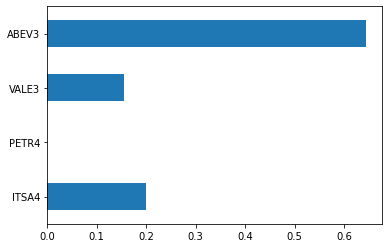

In [63]:
pd.Series(pesos_vol).plot.barh();

In [64]:
mv.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: -3.9%
Annual volatility: 20.2%
Sharpe Ratio: -0.51


(-0.039378839877071165, 0.20174350008765432, -0.5124271157789704)

In [65]:
pesos_vol = pesos_vol.values()
pesos_vol = list(pesos_vol)
pesos_vol = np.array(pesos_vol)
pesos_vol

array([0.19946, 0.     , 0.1558 , 0.64474])

In [66]:
#Comparar a volatilidade

vol_otimizada = np.sqrt(np.dot(pesos_vol.T, np.dot(cov_fut, pesos_vol)))
vol_otimizada = vol_otimizada*np.sqrt(252)
vol_otimizada

0.32350377993101787

In [67]:
#Comparar retorno
retorno_min_vol = cf_anualizado.dot(pesos_vol)
retorno_min_vol

0.03464893628662191

#7.1.1. Função Regularizadora

In [68]:
from pypfopt import objective_functions

In [69]:
mv_2 = EfficientFrontier(mme,exp_cov)
mv_2.add_objective(objective_functions.L2_reg, gamma=0.1)
mv_2.min_volatility()
pesos_2 = mv_2.clean_weights()
pesos_2

OrderedDict([('ITSA4', 0.27028),
             ('PETR4', 0.0791),
             ('VALE3', 0.24044),
             ('ABEV3', 0.41017)])

In [70]:
pesos_2 = pesos_2.values()
pesos_2 = list(pesos_2)
pesos_2 = np.array(pesos_2)
pesos_2

array([0.27028, 0.0791 , 0.24044, 0.41017])

In [71]:
vol_otimizada2 = np.sqrt(np.dot(pesos_2.T, np.dot(cov_fut, pesos_2)))
vol_otimizada2 = vol_otimizada2*np.sqrt(252)
vol_otimizada2

0.3210759767272274

In [72]:
retorno_min_vol_2 = cf_anualizado.dot(pesos_2)
retorno_min_vol_2

0.053313712881899

7.2. Modelo de Otimização Risco Eficiente

In [73]:
risco_eficiente = EfficientFrontier(mme, exp_cov)
risco_eficiente.efficient_risk(target_volatility=0.25)
re_pesos = risco_eficiente.clean_weights(rounding=2)
re_pesos

OrderedDict([('ITSA4', 0.6), ('PETR4', 0.0), ('VALE3', 0.33), ('ABEV3', 0.07)])

In [74]:
risco_eficiente.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: 32.6%
Annual volatility: 25.0%
Sharpe Ratio: 1.05


(0.32574474203385995, 0.2500000000869143, 1.04697896777145)

In [75]:
re_pesos = re_pesos.values()
re_pesos = list(re_pesos)
re_pesos = np.array(re_pesos)
re_pesos

array([0.6 , 0.  , 0.33, 0.07])

In [76]:
vol_re_otimizada = np.sqrt(np.dot(re_pesos.T, np.dot(cov_fut, re_pesos)))
vol_re_otimizada = vol_re_otimizada*np.sqrt(252)
vol_re_otimizada

0.33411542235251723

In [77]:
retorno_re_pesos = cf_anualizado.dot(re_pesos)
retorno_re_pesos

0.07192027530466048

7.3. Modelo de Otimização Retorno Eficiente


In [78]:
retorno_eficiente = EfficientFrontier(mme, exp_cov)
retorno_eficiente.efficient_return(target_return=0.25)
pesos_retorno_eficiente = retorno_eficiente.clean_weights()
pesos_retorno_eficiente

OrderedDict([('ITSA4', 0.51869),
             ('PETR4', 0.0),
             ('VALE3', 0.29434),
             ('ABEV3', 0.18696)])

In [79]:
pesos_retorno_eficiente = pesos_retorno_eficiente.values()
pesos_retorno_eficiente = list(pesos_retorno_eficiente)
pesos_retorno_eficiente = np.array(pesos_retorno_eficiente)
pesos_retorno_eficiente

array([0.51869, 0.     , 0.29434, 0.18696])

In [80]:
vol_re_otimizada2 = np.sqrt(np.dot(pesos_retorno_eficiente.T, np.dot(cov_fut, pesos_retorno_eficiente)))
vol_re_otimizada2 = vol_re_otimizada2*np.sqrt(252)
vol_re_otimizada2

0.3220260208787026

In [81]:
retorno_eficiente_2 = cf_anualizado.dot(pesos_retorno_eficiente)
retorno_eficiente_2

0.06430714233886077

7.4. Portfólio Max Sharpe

Modelo de maximização de Sharpe Ratio tem como objetivo maximzar o resultado da expressão (RiskFree - Retorno Esperado)/Volatilidade

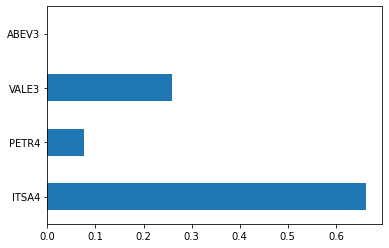

In [82]:
msharpe = EfficientFrontier(mme, exp_cov)
msharpe.max_sharpe(risk_free_rate=selic_aa)
sharpe_pesos = msharpe.clean_weights()
pd.Series(sharpe_pesos).plot.barh();

In [83]:
sharpe_pesos = sharpe_pesos.values()
sharpe_pesos = list(sharpe_pesos)
sharpe_pesos = np.array(sharpe_pesos)

In [84]:
volsharpe = np.sqrt(np.dot(sharpe_pesos.T, np.dot(cov_fut, sharpe_pesos)))
volsharpe = volsharpe*np.sqrt(252)
volsharpe

0.34482390828662585

In [85]:
retorno_sharpe = cf_anualizado.dot(sharpe_pesos)
retorno_sharpe

0.06588299582882408

In [86]:
msharpe.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: 38.1%
Annual volatility: 26.7%
Sharpe Ratio: 1.18


(0.3805957739984791, 0.26725832726076476, 1.1846058352732847)

8. Cenários Avançados de Otimização

In [87]:
ativos = ['ITSA4', 'PETR4', 'VALE3', 'ABEV3', 'IGTA3', 'BRML3','BBDC4','BBAS3','LREN3','RENT3']

inicio = '01/01/2017'
fim='31/12/2020'

carteira = pd.DataFrame()

for i in ativos:
  df_cenario = investpy.get_stock_historical_data(stock=i, country='Brazil', from_date=inicio, to_date=fim).Close
  df_cenario.rename(i,inplace=True)
  df_cenario.columns = [i]
  carteira = pd.concat([carteira, df_cenario], axis=1)
  carteira.index.name="Date"
carteira

,ITSA4,PETR4,VALE3,ABEV3,IGTA3,BRML3,BBDC4,BBAS3,LREN3,RENT3
Date,,,,,,,,,,
2017-01-02,5.27,14.06,18.33,15.36,26.62,10.45,12.17,25.03,16.43,10.81
2017-01-03,5.50,14.87,19.14,15.67,27.13,11.03,12.68,26.18,16.94,11.27
2017-01-04,5.53,14.87,18.80,15.55,27.83,11.01,12.60,26.04,16.79,11.45
2017-01-05,5.59,15.11,19.51,15.63,28.44,11.26,12.74,25.98,16.63,11.28
2017-01-06,5.57,15.02,18.99,15.50,28.60,11.15,12.82,26.26,16.44,11.27
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,10.97,27.28,73.90,15.51,36.49,9.85,21.04,38.29,42.80,64.88
2020-12-23,11.23,27.95,74.26,15.50,36.96,10.01,21.52,38.92,43.35,66.60
2020-12-28,11.35,28.18,74.22,15.77,37.58,10.25,21.73,39.35,43.60,66.70


In [88]:
#Adicionando renda fixa

search_results = investpy.search_quotes(text='tesouro', products=['bonds'], countries=['brazil'], n_results=30)

for search_result in search_results[7:8]:
  print(search_result)

{"id_": 1089896, "name": "Tesouro IPCA + NTNB 6 15-May-2035", "symbol": "NTB051535=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-may-2035", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [89]:
ipca_2035 = search_result.retrieve_historical_data(from_date=inicio,to_date=fim)

In [90]:
ipca_2035

,Open,High,Low,Close,Change Pct
Date,,,,,
2017-01-02,3071.644,3071.644,3071.644,3071.644,2.79
2017-01-03,3065.696,3065.696,3065.696,3065.696,-0.19
2017-01-04,3063.069,3063.069,3063.069,3063.069,-0.09
2017-01-05,3067.052,3067.052,3067.052,3067.052,0.13
2017-01-06,3057.831,3057.831,3057.831,3057.831,-0.30
...,...,...,...,...,...
2020-12-21,4384.612,4420.040,4384.612,4406.710,-0.09
2020-12-22,4435.510,4435.510,4422.140,4422.140,0.35
2020-12-23,4430.111,4430.111,4416.753,4416.750,-0.12


In [91]:
ipca_2035 = ipca_2035.rename({'Close':'TesouroIPCA'}, axis=1)

In [92]:
ipca_2035 = ipca_2035['TesouroIPCA']
ipca_2035

Date
2017-01-02    3071.644
2017-01-03    3065.696
2017-01-04    3063.069
2017-01-05    3067.052
2017-01-06    3057.831
                ...   
2020-12-21    4406.710
2020-12-22    4422.140
2020-12-23    4416.750
2020-12-28    4435.730
2020-12-29    4471.760
Name: TesouroIPCA, Length: 973, dtype: float64

In [93]:
carteira = pd.merge(carteira, ipca_2035, how='inner', left_index=True, right_index=True)
carteira

,ITSA4,PETR4,VALE3,ABEV3,IGTA3,BRML3,BBDC4,BBAS3,LREN3,RENT3,TesouroIPCA
Date,,,,,,,,,,,
2017-01-02,5.27,14.06,18.33,15.36,26.62,10.45,12.17,25.03,16.43,10.81,3071.644
2017-01-03,5.50,14.87,19.14,15.67,27.13,11.03,12.68,26.18,16.94,11.27,3065.696
2017-01-04,5.53,14.87,18.80,15.55,27.83,11.01,12.60,26.04,16.79,11.45,3063.069
2017-01-05,5.59,15.11,19.51,15.63,28.44,11.26,12.74,25.98,16.63,11.28,3067.052
2017-01-06,5.57,15.02,18.99,15.50,28.60,11.15,12.82,26.26,16.44,11.27,3057.831
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,10.95,27.02,73.84,15.42,37.07,10.09,20.62,37.79,43.58,65.74,4406.710
2020-12-22,10.97,27.28,73.90,15.51,36.49,9.85,21.04,38.29,42.80,64.88,4422.140
2020-12-23,11.23,27.95,74.26,15.50,36.96,10.01,21.52,38.92,43.35,66.60,4416.750


In [94]:
#Matriz de Covariancia

cov_matrix = risk_models.CovarianceShrinkage(carteira).ledoit_wolf()

In [95]:
#Retorno estimado

selic_aa2 = 0.0190
selic_diaria2 = (1+selic_aa2)**(1/252)-1

In [96]:
#Obter Ibovespa

ibov2 = investpy.get_index_historical_data('Bovespa', country='Brazil', from_date=inicio,to_date=fim)
ibov2 = pd.DataFrame(ibov2['Close'])

In [97]:
capm_carteira = expected_returns.capm_return(carteira, market_prices=ibov2, risk_free_rate=selic_diaria2)
capm_carteira

ITSA4          0.302727
PETR4          0.386293
VALE3          0.261663
ABEV3          0.165679
IGTA3          0.272307
BRML3          0.312656
BBDC4          0.355084
BBAS3          0.397150
LREN3          0.296118
RENT3          0.315008
TesouroIPCA    0.054912
Name: mkt, dtype: float64

In [98]:
ls = EfficientFrontier(capm_carteira, cov_matrix, weight_bounds=(None,None))
ls.min_volatility()
ls_pesos = ls.clean_weights()
ls_pesos

OrderedDict([('ITSA4', 0.05074),
             ('PETR4', -0.01784),
             ('VALE3', 0.08945),
             ('ABEV3', 0.10048),
             ('IGTA3', -0.0116),
             ('BRML3', -0.0389),
             ('BBDC4', 0.00916),
             ('BBAS3', -0.11375),
             ('LREN3', 0.02417),
             ('RENT3', 0.0159),
             ('TesouroIPCA', 0.8922)])

10. Restrições Setoriais

In [99]:
#Trabalhar com modelos proprietários de estimativa de retorno

ativos = ['ITSA4', 'PETR4', 'VALE3', 'ABEV3', 'IGTA3', 'BRML3','BBDC4','BBAS3','LREN3','RENT3', 'TesouroIPCA']

retornos_estimados = np.array([0.1,0.1,0.14,0.08,0.1,0.09,0.08,0.1,0.07,0.09,0.05])

retorno_analista = pd.Series(data=retornos_estimados,index=ativos)
retorno_analista

ITSA4          0.10
PETR4          0.10
VALE3          0.14
ABEV3          0.08
IGTA3          0.10
BRML3          0.09
BBDC4          0.08
BBAS3          0.10
LREN3          0.07
RENT3          0.09
TesouroIPCA    0.05
dtype: float64

In [100]:
sector_mapper ={"ITSA4": "Bancos",
                "PETR4": "Commodities",
                "VALE3": "Commodities",
                "ABEV3": "Varejo",
                "IGTA3": "Shoppings",
                "BRML3": "Shoppings",
                "BBDC4": "Bancos",
                "BBAS3": "Bancos",
                "LREN3": "Varejo",
                "RENT3": "Varejo",
                "TesouroIPCA": "Renda Fixa"}

In [101]:
sector_lower = {"Commodities": 0.05} #pelo menos 5% ou mais
sector_upper = {"Varejo": 0.10} #menos que 10% alocado em varejo

In [102]:
restricao_setorial = EfficientFrontier(retorno_analista, cov_matrix)
restricao_setorial.add_objective(objective_functions.L2_reg, gamma=0.1)
restricao_setorial.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
restricao_setorial.efficient_risk(target_volatility=0.25)
pesos_restricao = restricao_setorial.clean_weights()
pesos_restricao

OrderedDict([('ITSA4', 0.14303),
             ('PETR4', 0.087),
             ('VALE3', 0.32409),
             ('ABEV3', 0.06134),
             ('IGTA3', 0.13584),
             ('BRML3', 0.06103),
             ('BBDC4', 0.02521),
             ('BBAS3', 0.08725),
             ('LREN3', 0.0),
             ('RENT3', 0.03866),
             ('TesouroIPCA', 0.03656)])

11. Restrição Específica


In [103]:
#Carregar o modelo

restricao_ativo = EfficientFrontier(retorno_analista, cov_matrix)

#Construir a restrição 

tesouro = restricao_ativo.tickers.index("TesouroIPCA")
restricao_ativo.add_constraint(lambda w:w[tesouro] >=0.10)

#realizar otimização
restricao_ativo.max_sharpe()

#buscar os pesos

pesos_ativo = restricao_ativo.clean_weights()
pesos_ativo

OrderedDict([('ITSA4', 0.08558),
             ('PETR4', 0.0),
             ('VALE3', 0.2941),
             ('ABEV3', 0.10812),
             ('IGTA3', 0.05365),
             ('BRML3', 0.0),
             ('BBDC4', 0.0),
             ('BBAS3', 0.0),
             ('LREN3', 0.0),
             ('RENT3', 0.0),
             ('TesouroIPCA', 0.45855)])

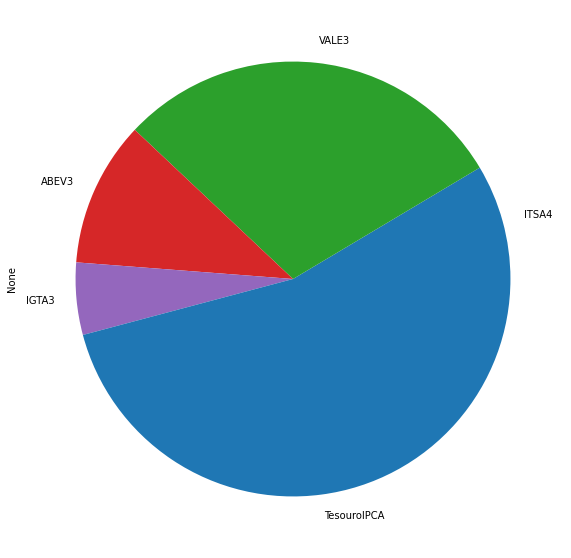

In [104]:
pd.Series(pesos_ativo).plot.pie(figsize=(10,10))

12.Otimização Semivariancia

In [105]:
semicov = risk_models.semicovariance(carteira, benchmark=0)
semicov

,ITSA4,PETR4,VALE3,ABEV3,IGTA3,BRML3,BBDC4,BBAS3,LREN3,RENT3,TesouroIPCA
ITSA4,0.047941,0.042726,0.020963,0.028954,0.039641,0.047114,0.044906,0.053083,0.040027,0.038222,0.011543
PETR4,0.042726,0.101849,0.036093,0.033092,0.047608,0.056219,0.049366,0.063372,0.042817,0.046914,0.016361
VALE3,0.020963,0.036093,0.068483,0.017982,0.022420,0.027202,0.024890,0.028372,0.022338,0.025742,0.005052
ABEV3,0.028954,0.033092,0.017982,0.041551,0.031736,0.036226,0.029984,0.035041,0.032170,0.029520,0.008571
IGTA3,0.039641,0.047608,0.022420,0.031736,0.061016,0.061108,0.043434,0.053155,0.046026,0.046015,0.014420
BRML3,0.047114,0.056219,0.027202,0.036226,0.061108,0.081348,0.051017,0.063383,0.053973,0.052966,0.016034
BBDC4,0.044906,0.049366,0.024890,0.029984,0.043434,0.051017,0.054893,0.058434,0.041388,0.041629,0.012946
BBAS3,0.053083,0.063372,0.028372,0.035041,0.053155,0.063383,0.058434,0.082566,0.051223,0.050361,0.017799
LREN3,0.040027,0.042817,0.022338,0.032170,0.046026,0.053973,0.041388,0.051223,0.063209,0.045300,0.012005
RENT3,0.038222,0.046914,0.025742,0.029520,0.046015,0.052966,0.041629,0.050361,0.045300,0.069389,0.012273


In [106]:
from pypfopt import EfficientSemivariance

In [107]:
retornos_df = expected_returns.returns_from_prices(carteira)
retornos_df = retornos_df.dropna()

In [108]:
ef_semiv = EfficientSemivariance(capm_carteira, retornos_df)
ef_semiv.efficient_return(0.2)
ef_pesos = ef_semiv.clean_weights()
ef_pesos

OrderedDict([('ITSA4', 0.05138),
             ('PETR4', 0.01145),
             ('VALE3', 0.20211),
             ('ABEV3', 0.04605),
             ('IGTA3', 0.0),
             ('BRML3', 0.0),
             ('BBDC4', 0.1725),
             ('BBAS3', 0.0),
             ('LREN3', 0.03915),
             ('RENT3', 0.07863),
             ('TesouroIPCA', 0.39873)])

In [109]:
ef_semiv.portfolio_performance(verbose=True, risk_free_rate=selic_diaria2)

Expected annual return: 20.0%
Annual semi-deviation: 12.6%
Sortino Ratio: 1.58


(0.19999998578323117, 0.12627905883529672, 1.5832022770592926)

13. Hierarchical Risk Parity
-Marcos López de Prado: Building Diversified Portfolios that Outperform Out of Sample. The Journal of Portfolio Management, 42(4), 59–69.

In [110]:
from pypfopt import HRPOpt

In [111]:
hrp_portfolio = HRPOpt(retornos_df)

In [112]:
hrp_portfolio.optimize()

OrderedDict([('ABEV3', 0.11847462708932652),
             ('BBAS3', 0.029508601216346554),
             ('BBDC4', 0.02270404626987598),
             ('BRML3', 0.01677757410522095),
             ('IGTA3', 0.02225036647284712),
             ('ITSA4', 0.027607034658140295),
             ('LREN3', 0.03511580969808479),
             ('PETR4', 0.030921066785020504),
             ('RENT3', 0.034813241254918234),
             ('TesouroIPCA', 0.5926444842899776),
             ('VALE3', 0.0691831481602414)])

In [113]:
hrp_portfolio.portfolio_performance(verbose=True, risk_free_rate=selic_diaria2)

Expected annual return: 16.0%
Annual volatility: 14.6%
Sharpe Ratio: 1.09


(0.16016747890793454, 0.14623305688592866, 1.0947783628877592)

In [114]:
from pypfopt import plotting

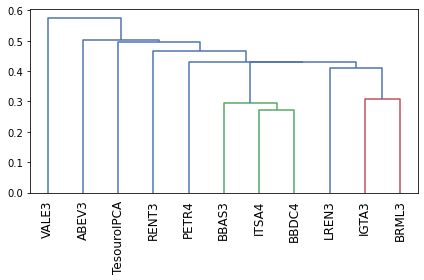

In [115]:
plotting.plot_dendrogram(hrp_portfolio)